In [16]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import numpy as np
pi =np.pi
#from qiskit import *
#from qiskit import BasicAer
from qiskit_aer import Aer
#from qiskit import execute

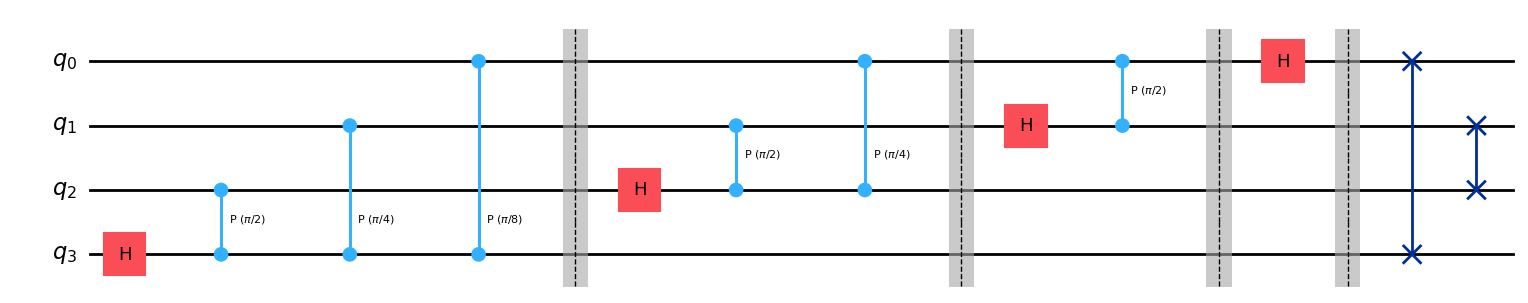

In [17]:
n=4

qftn=QuantumCircuit(n,name='QFT')

for i in range(n-1,-1,-1):
    qftn.h(i)
    p=0
    for j in range(i):
        p+=1
        qftn.cp(pi/(2**p),i-j-1,i)
    qftn.barrier()
    
for i in range(int(n/2)):
    qftn.swap(i,n-1-i)
    
qftn.draw('mpl')


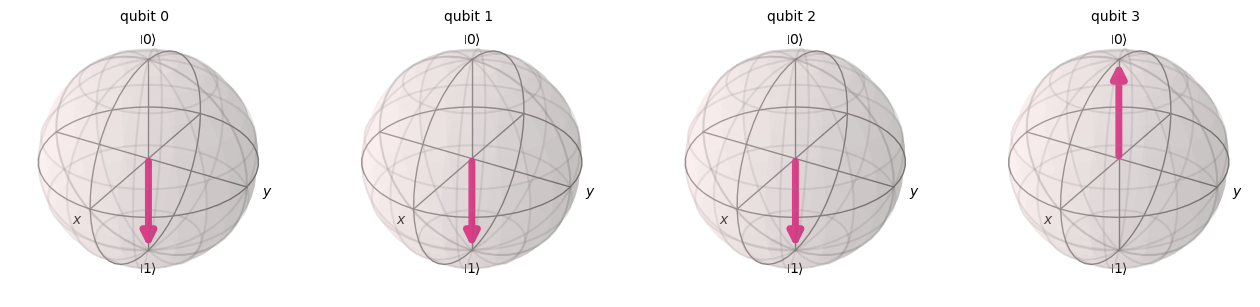

In [18]:
from qiskit.visualization import plot_state_qsphere , plot_histogram , plot_bloch_multivector
from qiskit.quantum_info import Statevector

sv=Statevector.from_label('0111')
plot_bloch_multivector(sv)

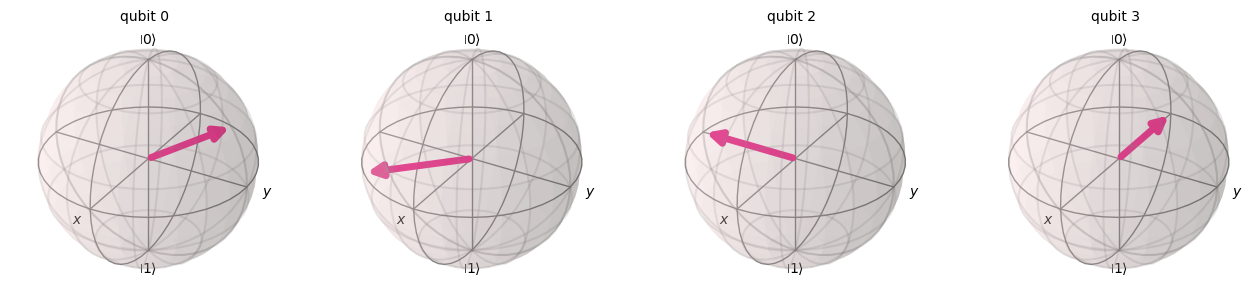

In [19]:
new_sv=sv.evolve(qftn)
plot_bloch_multivector(new_sv)

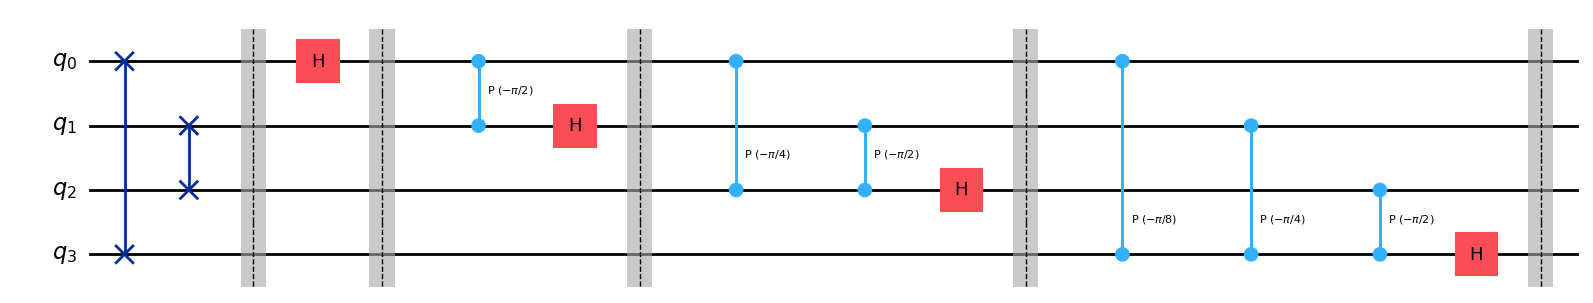

In [20]:
n=4
iqftn=QuantumCircuit(n,name='IQFT')

for i in range(int(n/2)):
    iqftn.swap(i,n-1-i)
    
iqftn.barrier()

for i in range(n):
    p=i+1
    for j in range(i):
        p-=1
        iqftn.cp(-pi/(2**(p)),j,i)
    iqftn.h(i)
    iqftn.barrier()
    
iqftn.draw('mpl')

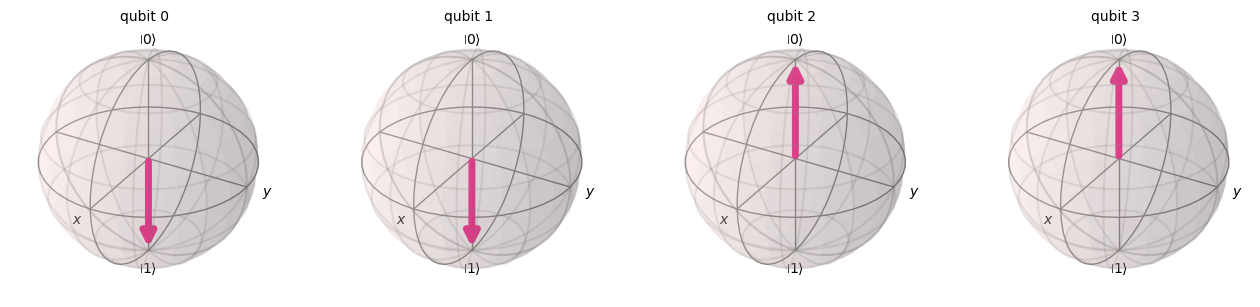

In [21]:
sv=Statevector.from_label('0011')
plot_bloch_multivector(sv)

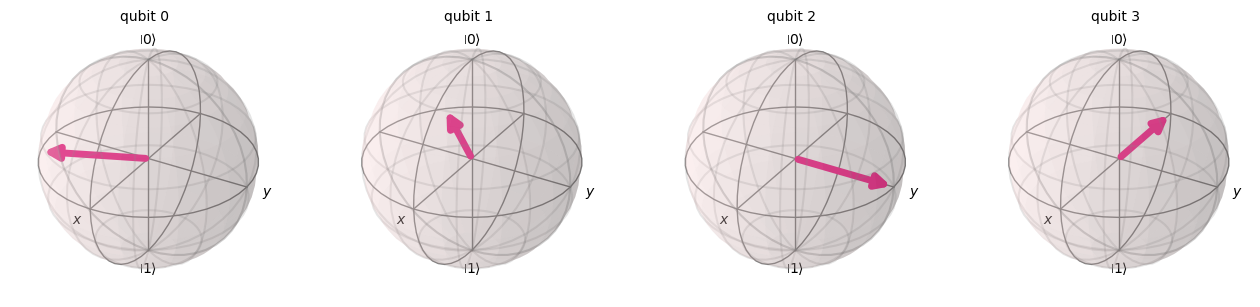

In [22]:
new_sv=sv.evolve(iqftn)
plot_bloch_multivector(new_sv)

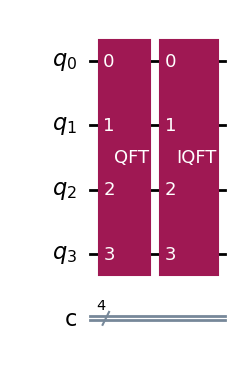

In [23]:
n=4

identity=QuantumCircuit(n,n,name='QFT IQFT')
#identity=QuantumCircuit(n,name='QFT IQFT')
identity.append(qftn,range(n))
identity.append(iqftn,range(n))

identity.draw('mpl')